# Mars Express Electric Current Prediction

<h3> Objective: predict the average electric current per hour for 4th Martian Year </h3>

<h3> Training Data </h3>

* Year 1: 2008-08-22 to 2010-07-10
* Year 2: 2010-07-10 to 2012-05-27
* Year 3: 2012-05-27 to 2014-04-14

<h3>Test Data for Prediction </h3>

* Year 4: 2014-04-14 to 2016-03-01

In [1]:
import os
import math
%matplotlib inline
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import timedelta

In [2]:
def time_convert(time):
    time_converted = datetime.fromtimestamp(time/1000)
    return time_converted

In [3]:
def convert(data):
    data['ut_ms'] = data['ut_ms'].map(time_convert)
    data.set_index('ut_ms', inplace = True)
    return data

<h3> Features (Context Data) </h3>

* SAAF: Solar Aspect Angles
* DMOP: Detailed Mission Operations Plan
* FTL: Flight dynamics TimeLine with spacecraft pointing events
* EVTF: Other events
* LTDATA: long term data such as the sun-mars distance

<h3> Target Data </h3>

* NPWD****: 33 columns/parameters with the electric current measurements

In [4]:
# Target Variable
'''
y1 = pd.read_csv("train_set/power--2008-08-22_2010-07-10.csv")
y2 = pd.read_csv("train_set/power--2010-07-10_2012-05-27.csv")
y3 = pd.read_csv("train_set/power--2012-05-27_2014-04-14.csv")
y_test = pd.read_csv("test_set/power--2014-01-01_2015-01-01.csv")
target = pd.concat([y1c, y2c, y3c, y_test])
target = convert(target)
target = target.resample("60s").mean().fillna(0).resample("1H").mean()
target.to_csv("target1h.csv")
'''

'\ny1 = pd.read_csv("train_set/power--2008-08-22_2010-07-10.csv")\ny2 = pd.read_csv("train_set/power--2010-07-10_2012-05-27.csv")\ny3 = pd.read_csv("train_set/power--2012-05-27_2014-04-14.csv")\ny_test = pd.read_csv("test_set/power--2014-01-01_2015-01-01.csv")\ntarget = pd.concat([y1c, y2c, y3c, y_test])\ntarget = convert(target)\ntarget = target.resample("60s").mean().fillna(0).resample("1H").mean()\ntarget.to_csv("target1h.csv")\n'

In [5]:
target = pd.read_csv("target1h.csv", index_col='ut_ms')
target.index = pd.to_datetime(target.index)

<Figure size 1584x1008 with 0 Axes>

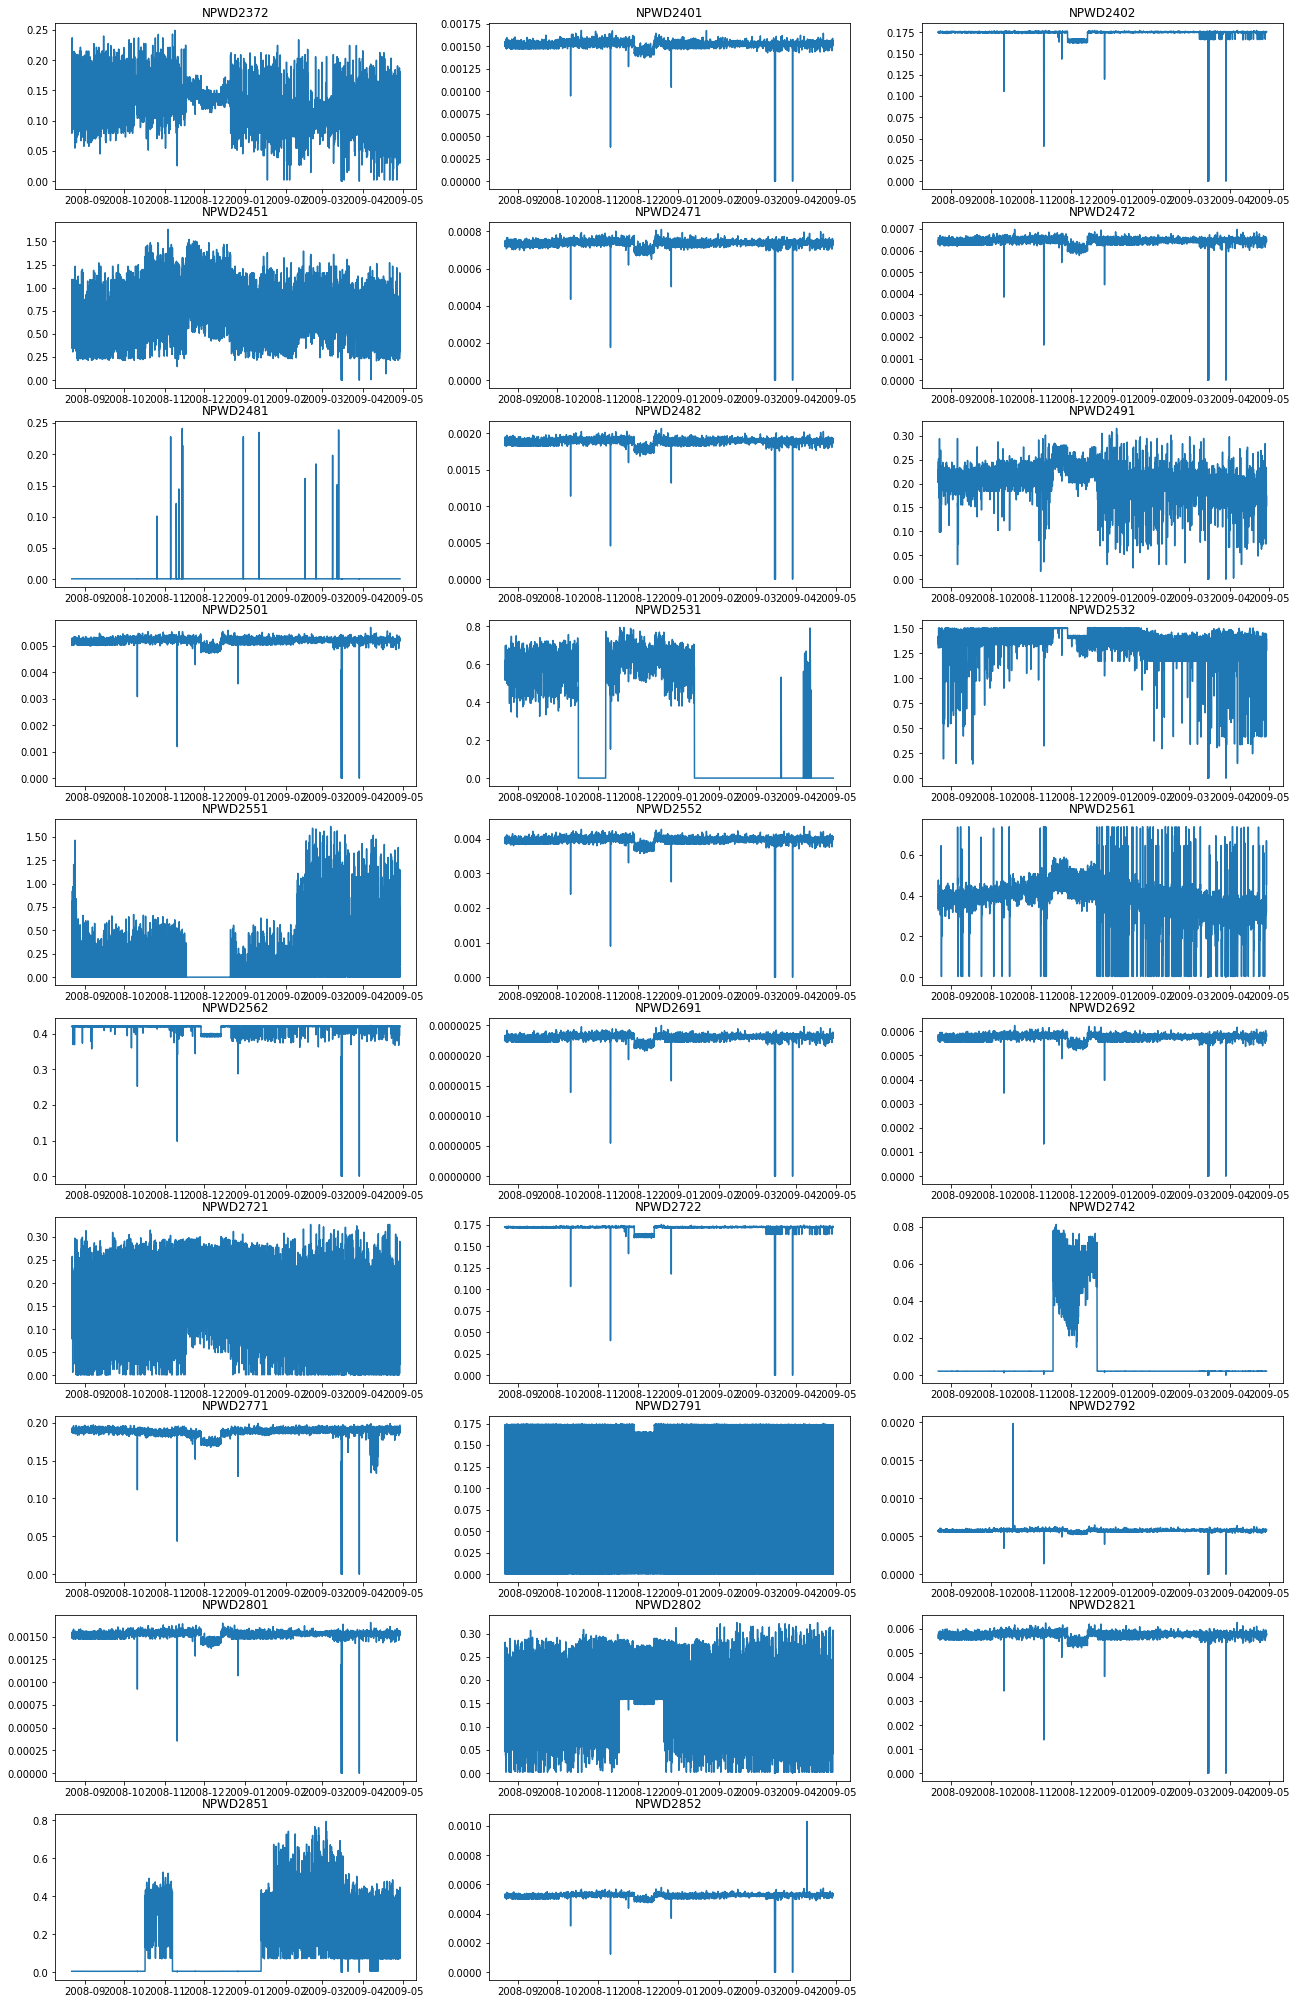

In [6]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (22,14))
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(22,36))
for i, j in zip(range(1,30), target.columns):
    ax = fig.add_subplot(10,3,i)
    ax.plot(target[j][:6000])
    ax.set_title(j)

# SAAF

* sa: solar aspect angle, angle of Mars Express solar panels' normal
* sx: solar angle of the X axis of satellite
* sy: solar angle of the Y axis of satellite
* sz: solar angle of the Z axis of satellite
* Raw Data

In [7]:
#The solar aspect angle is defined as the angle between the pointing direction (the -X axis) and the vector to the Sun.
#Given the condition that the Z axis MUST lie within a 20 degree cone around the Sun, 
#this restricts the allowed solar aspect angle range to lie between 70 and 110 degrees.

In [8]:
'''
saaf1 = pd.read_csv("train_set/context--2008-08-22_2010-07-10--saaf.csv")
saaf2 = pd.read_csv("train_set/context--2010-07-10_2012-05-27--saaf.csv")
saaf3 = pd.read_csv("train_set/context--2012-05-27_2014-04-14--saaf.csv")
saaf_test = pd.read_csv("test_set/context--2014-04-14_2016-03-01--saaf.csv")
saaf = pd.concat([saaf1c, saaf2c, saaf3c, saaf_test])
saaf = convert(saaf)
saaf.to_csv("saaf.csv")
'''

'\nsaaf1 = pd.read_csv("train_set/context--2008-08-22_2010-07-10--saaf.csv")\nsaaf2 = pd.read_csv("train_set/context--2010-07-10_2012-05-27--saaf.csv")\nsaaf3 = pd.read_csv("train_set/context--2012-05-27_2014-04-14--saaf.csv")\nsaaf_test = pd.read_csv("test_set/context--2014-04-14_2016-03-01--saaf.csv")\nsaaf = pd.concat([saaf1c, saaf2c, saaf3c, saaf_test])\nsaaf = convert(saaf)\nsaaf.to_csv("saaf.csv")\n'

In [9]:
saaf = pd.read_csv("saaf.csv", index_col = 'ut_ms')
saaf.index = pd.to_datetime(saaf.index)
saaf = saaf.resample("60s").mean().fillna(0).resample("1H").mean()

FileNotFoundError: File b'saaf.csv' does not exist

In [ ]:
def product(angle, solar_constant, umbra):
    max(np.cos(angle, 0))*solar_constant*umbra

# SAAF + ltdata (RF RMSE: 0.1153)

<h3> ltdata </h3>

* Raw Data
* Previous Hour Data (-1)
* Rolling mean for last 6 hours
* Rolling mean for last 24 hours

In [ ]:
ltdata1 = pd.read_csv("train_set/context--2008-08-22_2010-07-10--ltdata.csv")
ltdata2 = pd.read_csv("train_set/context--2010-07-10_2012-05-27--ltdata.csv")
ltdata3 = pd.read_csv("train_set/context--2012-05-27_2014-04-14--ltdata.csv")
ltdata_test = pd.read_csv("test_set/context--2014-04-14_2016-03-01--ltdata.csv")
ltdata = pd.concat([ltdata1, ltdata2, ltdata3, ltdata_test])
ltdata = convert(ltdata)

In [ ]:
ltdata = pd.concat([ltdata, ltdata.shift(-1), ltdata.rolling(6).mean(), ltdata.rolling(24).mean()], axis = 1)

In [ ]:
#Method : Linear 
ltdata = ltdata.resample("1H").ffill().interpolate(method = 'linear', limit_direction = 'both')

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler = MinMaxScaler()
sscaler = StandardScaler()
x = pd.concat([saaf, ltdata], axis = 1).interpolate(method = 'linear', limit_direction = 'both')
x_train = scaler.fit_transform(x.loc[:'2014-04-14 02:00:00'])
x_test = scaler.fit_transform(x.loc['2014-04-14 02:00:00':])
y_train = target.loc[:'2014-04-14 02:00:00']
y_test = target.loc['2014-04-14 02:00:00':]
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
pred = rf.predict(x_test)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, pred[:len(y_test)])
rmse = math.sqrt(mse)
rmse

# SAAF + ltdata + ftl (RF RMSE: 0.10769)

<h3> ftl </h3>

* One hot encoding of flagcomms and type
* (Works better than Label encoding and binary encoding)

In [39]:
ftl1 = pd.read_csv("train_set/context--2008-08-22_2010-07-10--ftl.csv")
ftl2 = pd.read_csv("train_set/context--2010-07-10_2012-05-27--ftl.csv")
ftl3 = pd.read_csv("train_set/context--2012-05-27_2014-04-14--ftl.csv")
ftl_test = pd.read_csv("test_set/context--2014-04-14_2016-03-01--ftl.csv")
ftl = pd.concat([ftl1, ftl2, ftl3, ftl_test])
ftl.columns = ['ut_ms','ute_ms', 'type', 'flagcomms']
ftl = convert(ftl)
ftl.drop('ute_ms', axis = 1, inplace = True)

In [40]:
#One hot encoding type and flagcomms
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
labelencoder = LabelEncoder()
ohencoder = OneHotEncoder(sparse = False)
ftl['type'] = labelencoder.fit_transform(ftl['type'])
ftl['flagcomms'] = labelencoder.fit_transform(ftl['flagcomms'])
ftl_ohe = ohencoder.fit_transform(ftl)
ftl = pd.DataFrame(ftl_ohe, index = ftl.index)

In [41]:
ftl = ftl.resample("1H").pad().fillna(0)

In [42]:
x = pd.concat([saaf, ltdata, ftl], axis = 1).interpolate(method = 'linear', limit_direction = 'both')
x_train = scaler.fit_transform(x.loc[:'2014-04-14 02:00:00'])
x_test = scaler.fit_transform(x.loc['2014-04-14 02:00:00':])
y_train = target.loc[:'2014-04-14 02:00:00']
y_test = target.loc['2014-04-14 02:00:00':]
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
pred = rf.predict(x_test)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, pred[:len(y_test)])
rmse = math.sqrt(mse)
rmse

0.10769098687343603

# SAAF + ltdata + ftl + DMOP (RF RMSE: 0.10719)

<h3> DMOP (Commands)</h3>

* One hot encoding for each subsystem and their avearge for 1 hour (average works better than count)
* AAAAF / APSF / AVVV / AMMMF / ASSSF / ATTT / AACFE / AXXX / AHHHF / AACF / AOOO / Others

In [43]:
dmop1 = pd.read_csv("train_set/context--2008-08-22_2010-07-10--dmop.csv")
dmop2 = pd.read_csv("train_set/context--2010-07-10_2012-05-27--dmop.csv")
dmop3 = pd.read_csv("train_set/context--2012-05-27_2014-04-14--dmop.csv")
dmop_test = pd.read_csv("test_set/context--2014-04-14_2016-03-01--dmop.csv")
dmop = pd.concat([dmop1, dmop2, dmop3, dmop_test])
dmop = convert(dmop)

In [44]:
# DMOP encoding method 1 : Label encoding / One-hot encoding / Binary encoding
# (AACFE, AAAAF, APSF, AVVV, AMMMF, ASSSF, ATTTTF, Others)

In [45]:
dmop_e = dmop.copy()

In [46]:
dmop_major = ['AAAAF', 'APSF', 'AVVV', 'AMMMF', 'ASSSF', 'ATTT', 'AACFE', 'AXXX', 'AHHHF', "AACF", 'AOOO']

In [47]:
dmop_e.loc[dmop['subsystem'].str.contains("AAAAF"), "subsystem"] = 1
dmop_e.loc[dmop['subsystem'].str.contains("APSF"), "subsystem"] = 2
dmop_e.loc[dmop['subsystem'].str.contains("AVVV"), "subsystem"] = 3
dmop_e.loc[dmop['subsystem'].str.contains("AMMMF"), "subsystem"] = 4
dmop_e.loc[dmop['subsystem'].str.contains("ASSSF"), "subsystem"] = 5
dmop_e.loc[dmop['subsystem'].str.contains("ATTT"), "subsystem"] = 6
dmop_e.loc[dmop['subsystem'].str.contains("AACFE"), "subsystem"] = 7
dmop_e.loc[dmop['subsystem'].str.contains("AXXX"), "subsystem"] = 8
dmop_e.loc[dmop['subsystem'].str.contains("AHHHF"), "subsystem"] = 9
dmop_e.loc[dmop['subsystem'].str.contains("AACF"), "subsystem"] = 10
dmop_e.loc[dmop['subsystem'].str.contains("AOOO"), "subsystem"] = 11

In [48]:
for i in dmop_e.iterrows():
    if np.array(i[1][0]).dtype != 'int32':
        i[1][0] = 0

In [49]:
ohencoder = OneHotEncoder(sparse = False, n_values = 12)
dmop_ohe = ohencoder.fit_transform(dmop_e)
dmop_ohe = pd.DataFrame(dmop_ohe, index = dmop.index)

In [50]:
dmop_e = dmop_ohe.resample("1H").mean()

In [51]:
x = pd.concat([saaf, ltdata, ftl, dmop_e], axis = 1).interpolate(method = 'linear', limit_direction = 'both')
x_train = scaler.fit_transform(x.loc[:'2014-04-14 02:00:00'])
x_test = scaler.fit_transform(x.loc['2014-04-14 02:00:00':])
y_train = target.loc[:'2014-04-14 02:00:00']
y_test = target.loc['2014-04-14 02:00:00':]
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
pred = rf.predict(x_test)
mse = mean_squared_error(y_test, pred[:len(y_test)])
rmse = math.sqrt(mse)

In [52]:
rmse

0.10719736248112442

# SAAF + ltdata + ftl + DMOP + evtf (RF RMSE: 0.094678)

<h3> evtf </h3>

* One hot encoding for major events and average for 1 hour
* evt_major1 = ['MRB_', 'DESCEND', 'ASCEND', 'MSL_', 'OCC', '_PENUMBRA_', '_UMBRA_', 'NNO_', 'CEB_', 'CAN_', 'GDS_', 'BLK_','KLZ_', 'MAD_', 'MLG_']
* evt_major2 = ['_RANGE', '_RTLT_', '_RA_', '_SSP_']
* evt_major3 = ['_SZA_', '_DE_']
* evt_major4 = ['_OMP']

In [998]:
evtf1 = pd.read_csv("train_set/context--2008-08-22_2010-07-10--evtf.csv")
evtf2 = pd.read_csv("train_set/context--2010-07-10_2012-05-27--evtf.csv")
evtf3 = pd.read_csv("train_set/context--2012-05-27_2014-04-14--evtf.csv")
evtf_test = pd.read_csv("test_set/context--2014-04-14_2016-03-01--evtf.csv")
evtf = pd.concat([evtf1, evtf2, evtf3, evtf_test])
evtf = convert(evtf)

In [54]:
evt_major1 = ['MRB_', 'DESCEND', 'ASCEND', 'MSL_', 'OCC', '_PENUMBRA_', '_UMBRA_', 'NNO_', 'CEB_', 'CAN_', 'GDS_', 'BLK_','KLZ_', 'MAD_', 'MLG_']
evt_major2 = ['_RANGE', '_RTLT_', '_RA_', '_SSP_']
evt_major3 = ['_SZA_', '_DE_']
evt_major4 = ['_OMP']

In [55]:
evt_table = []
for i in evtf.iterrows():
    evt_row = []
    
    try:
        for j, k in zip(evt_major4, range(1, len(evt_major4))):
            evt = i[1][0].find(j)
            if evt != -1:
                evt_row.append(k)
        evt_row[0]
    except:
        evt_row.append(0)

    try: 
        for j, k in zip(evt_major3, range(1, len(evt_major3))):
            evt = i[1][0].find(j)
            if evt != -1:
                evt_row.append(k)
        evt_row[1]
    except:
        evt_row.append(0)
        
    try:
        for j, k in zip(evt_major2, range(1, len(evt_major2))):
            evt = i[1][0].find(j)
            if evt != -1:
                evt_row.append(k)
        evt_row[2]
    except:
        evt_row.append(0)

    try:
        for j, k in zip(evt_major1, range(1, len(evt_major1))):
            evt = i[1][0].find(j)
            if evt != -1:
                evt_row.append(k)
        evt_row[3]
    except:
        evt_row.append(0)

        
    evt_table.append(evt_row)

In [56]:
evtf_e = pd.DataFrame(evt_table, index=evtf.index)

In [57]:
evtf_e.fillna(0, inplace=True)

In [58]:
ohencoder = OneHotEncoder(sparse = False, n_values = len(evt_major4)+1)
evtf_ohe1 = ohencoder.fit_transform(np.array(evtf_e.iloc[:,0]).reshape(-1,1))
ohencoder = OneHotEncoder(sparse = False, n_values = len(evt_major3)+1)
evtf_ohe2 = ohencoder.fit_transform(np.array(evtf_e.iloc[:,1]).reshape(-1,1))
ohencoder = OneHotEncoder(sparse = False, n_values = len(evt_major2)+1)
evtf_ohe3 = ohencoder.fit_transform(np.array(evtf_e.iloc[:,2]).reshape(-1,1))
ohencoder = OneHotEncoder(sparse = False, n_values = len(evt_major1)+1)
evtf_ohe4 = ohencoder.fit_transform(np.array(evtf_e.iloc[:,3:]))

In [59]:
evtf_ohe = pd.concat([pd.DataFrame(evtf_ohe1), pd.DataFrame(evtf_ohe2), pd.DataFrame(evtf_ohe3), pd.DataFrame(evtf_ohe4)], axis = 1)

In [60]:
evtf_ohe.index = evtf_e.index

In [62]:
evtf_e = evtf_ohe.resample("1H").mean()

In [921]:
x = pd.concat([saaf, ltdata, ftl, dmop_e, evtf_e], axis = 1).interpolate(method = 'linear', limit_direction = 'both')
x_train = scaler.fit_transform(x.loc[:'2014-04-14 02:00:00'])
x_test = scaler.fit_transform(x.loc['2014-04-14 02:00:00':])
y_train = target.loc[:'2014-04-14 02:00:00']
y_test = target.loc['2014-04-14 02:00:00':]
rf = RandomForestRegressor(max_depth = 10, n_jobs = 4)
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)
mse = mean_squared_error(y_test, rf_pred[:len(y_test)])
rmse = math.sqrt(mse)
rmse

0.09467818018311447

# RMSE Summary based on features

| Data         | saaf+ltdata |    +ftl   |   +DMOP   |  +Event  | 
|--------------|-------------|-----------|-----------|----------|
|Random Forest |   0.1153    |  0.10769  |  0.10719  | 0.094678 |

# Random Forest Model: RMSE 0.0941

* Training data: 2008-08-22  02:00:00 to 2014-04-14  02:00:00
* Test Data: 2004-04-14  02:00:00 to 2015-01-01  00:00:00
* saaf data excluded for better prediction performance

In [847]:
x = pd.concat([ltdata, ftl, dmop_e, evtf_e], axis = 1).interpolate(method = 'linear', limit_direction = 'both')
x_train = scaler.fit_transform(x.loc[:'2014-04-14 02:00:00'])
x_test = scaler.fit_transform(x.loc['2014-04-14 02:00:00':])
y_train = target.loc[:'2014-04-14 02:00:00']
y_test = target.loc['2014-04-14 02:00:00':]

<h3> RF RMSE with Test Data </h3>

In [848]:
rf = RandomForestRegressor(max_depth = 10, n_jobs = 4)
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)
mse = mean_squared_error(y_test, rf_pred[:len(y_test)])
rmse = math.sqrt(mse)
rmse

0.09409880810063713

In [841]:
from sklearn.svm import LinearSVR
from sklearn.model_selection import cross_val_score, cross_val_predict
cv_pred = cross_val_predict(rf, x[:len(target)], target, cv = 5, n_jobs = 4)
cv_pred = pd.DataFrame(cv_pred)
cv_pred.index = x.index[:len(cv_pred)]

# Neural Network Models

In [665]:
x = pd.concat([ltdata, ftl, dmop_e, evtf_e], axis = 1).interpolate(method = 'linear', limit_direction = 'both')
x_train = scaler.fit_transform(x.loc[:'2014-04-14 02:00:00'])
x_test = scaler.fit_transform(x.loc['2014-04-14 02:00:00':])
y_train = target.loc[:'2014-04-14 02:00:00']
y_test = target.loc['2014-04-14 02:00:00':]

In [666]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM, Embedding, Dropout, Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.normalization import BatchNormalization
import tensorflow as tf 
from keras.wrappers.scikit_learn import KerasRegressor

# Sequential RMSE: 0.095294238490445

In [852]:
model = Sequential()
model.add(Dense(99, activation = 'relu', kernel_initializer='normal', input_shape = (len(x.columns),)))
model.add(Dense(33, activation = 'linear'))
model.compile(optimizer = 'adam', loss = 'mse')
model.fit(x_train, y_train, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
49465/49465 [==============================] - 12s 234us/step - loss: 0.0101
Epoch 2/10
49465/49465 [==============================] - 5s 98us/step - loss: 0.0081
Epoch 3/10
49465/49465 [==============================] - 5s 99us/step - loss: 0.0077
Epoch 4/10
49465/49465 [==============================] - 5s 99us/step - loss: 0.0074
Epoch 5/10
49465/49465 [==============================] - 5s 95us/step - loss: 0.0072
Epoch 6/10
49465/49465 [==============================] - 4s 90us/step - loss: 0.0070
Epoch 7/10
49465/49465 [==============================] - 5s 99us/step - loss: 0.0069
Epoch 8/10
49465/49465 [==============================] - 5s 99us/step - loss: 0.0068
Epoch 9/10
49465/49465 [==============================] - 5s 103us/step - loss: 0.0068
Epoch 10/10
49465/49465 [==============================] - 6s 117us/step - loss: 0.0067


In [853]:
score = model.evaluate(x_test[:len(y_test)], y_test, verbose=0)
math.sqrt(score)

0.095294238490445

In [851]:
seq_pred = model.predict(x_test[:len(y_test)])

# LSTM RMSE: 0.093492612168370737

In [671]:
model = Sequential()
model.add(LSTM(512, activation = 'relu', return_sequences = True, input_shape = (None, x_train.shape[1]), dropout = 0.3))
model.add(LSTM(512))
model.add(Dense(33, activation = 'linear'))
model.compile(optimizer = 'adam', loss = 'mse', metrics=['accuracy'])

In [672]:
x_lstm = x_train.reshape(x_train.shape[0],1, x_train.shape[1])
model.fit(x_lstm, y_train, epochs=10, batch_size= 64, verbose=1)

Epoch 1/10
49465/49465 [==============================] - 178s 4ms/step - loss: 0.0115 - acc: 0.9128
Epoch 2/10
49465/49465 [==============================] - 174s 4ms/step - loss: 0.0093 - acc: 0.9145
Epoch 3/10
49465/49465 [==============================] - 172s 3ms/step - loss: 0.0088 - acc: 0.9139
Epoch 4/10
49465/49465 [==============================] - 178s 4ms/step - loss: 0.0084 - acc: 0.9139
Epoch 5/10
49465/49465 [==============================] - 187s 4ms/step - loss: 0.0081 - acc: 0.9144
Epoch 6/10
49465/49465 [==============================] - 194s 4ms/step - loss: 0.0079 - acc: 0.9152
Epoch 7/10
49465/49465 [==============================] - 211s 4ms/step - loss: 0.0077 - acc: 0.9156
Epoch 8/10
49465/49465 [==============================] - 213s 4ms/step - loss: 0.0075 - acc: 0.9153
Epoch 9/10
49465/49465 [==============================] - 212s 4ms/step - loss: 0.0074 - acc: 0.9160
Epoch 10/10
49465/49465 [==============================] - 213s 4ms/step - loss: 0.0073 - a

In [673]:
x_lstm_test = x_test.reshape(x_test.shape[0], 1, x_test.shape[1])
score = model.evaluate(x_lstm_test[:len(y_test)], y_test, verbose=0)

In [674]:
np.sqrt(score[0])

0.093492612168370737

In [675]:
lstm_pred = model.predict(x_lstm_test[:len(y_test)])

# CNN RMSE: 0.095668481926968876

In [957]:
from keras.layers.convolutional import AveragePooling1D
x_cnn = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
input_shape = (x_train.shape[1], 1)
model = Sequential()
model.add(Conv1D(x_train.shape[1], kernel_size = (20), activation = 'relu', input_shape = input_shape))
model.add(MaxPooling1D(pool_size = (20), strides = 2, padding='valid'))
model.add(Dense(512, activation = 'relu'))
model.add(Flatten())
model.add(Dense(33, activation = 'linear'))
model.compile(optimizer = 'adam', loss = 'mse', metrics=['accuracy'])

In [958]:
model.fit(x_cnn, y_train, epochs=10, batch_size= 64, verbose=1)

Epoch 1/10
49465/49465 [==============================] - 67s 1ms/step - loss: 0.0095 - acc: 0.9135
Epoch 2/10
49465/49465 [==============================] - 54s 1ms/step - loss: 0.0075 - acc: 0.9145
Epoch 3/10
49465/49465 [==============================] - 55s 1ms/step - loss: 0.0070 - acc: 0.9157
Epoch 4/10
49465/49465 [==============================] - 55s 1ms/step - loss: 0.0068 - acc: 0.9154
Epoch 5/10
49465/49465 [==============================] - 65s 1ms/step - loss: 0.0066 - acc: 0.9162
Epoch 6/10
49465/49465 [==============================] - 65s 1ms/step - loss: 0.0065 - acc: 0.9170
Epoch 7/10
49465/49465 [==============================] - 68s 1ms/step - loss: 0.0063 - acc: 0.9173
Epoch 8/10
49465/49465 [==============================] - 63s 1ms/step - loss: 0.0062 - acc: 0.9177
Epoch 9/10
49465/49465 [==============================] - 60s 1ms/step - loss: 0.0062 - acc: 0.9181
Epoch 10/10
49465/49465 [==============================] - 57s 1ms/step - loss: 0.0061 - acc: 0.9187

In [959]:
x_cnn_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)
score = model.evaluate(x_cnn_test[:len(y_test)], y_test, verbose=0)
np.sqrt(score[0])

0.094437813468892892

In [960]:
cnn_pred = model.predict(x_cnn_test[:len(y_test)])

# Ensemble (RF + Sequential + LSTM + CNN)

<h3> Average Ensemble: 0.090220107436352212 

In [961]:
en = (rf_pred[:len(y_test)] + seq_pred + lstm_pred+cnn_pred)/4
ensembled = mean_squared_error(y_test, en)
np.sqrt(ensembled)

0.089176871028740223

<h3> Weighted Average Ensemble: 0.088897021808498858

In [987]:
en2 = rf_pred[:len(y_test)] * .25 + seq_pred * .15 + lstm_pred *.35 + cnn_pred * .25
ensembled2 = mean_squared_error(y_test, en2)
np.sqrt(ensembled2)

0.089210776512344117

# RMSE Summary

|Model| Random Forest|  Sequential | LSTM      |  CNN      | Average  | Weighted Avg |
|-----|--------------|-------------|-----------|-----------|----------|--------------|
|RMSE |   0.094678   |   0.09529   |  0.093492 |  0.09566  | 0.090220 |       0.08889|